In [56]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_distribution(samples: torch.Tensor):
    data_np = samples.cpu()
    
    # Create a range for plotting the PDF
    x = np.linspace(data_np.min(), data_np.max(), 1000)
    
    plt.figure(figsize=(10, 6))
    
    # Plot the analytical PDF for each batch
    for i in range(batch_size):
        # Calculate mean and std for the batch
        mean = data_np[:, i].mean()
        std = data_np[:, i].std()
        
        # Calculate the PDF for a normal distribution with mean and std
        pdf = norm.pdf(x, mean, std)
        
        # Plot the PDF
        plt.plot(x, pdf, label=f'Batch {i+1}')
    
    plt.title("Analytical PDF of Each Batch (Assuming Normal Distribution)")
    plt.xlim(0, 1)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [57]:

batch_size = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

central_points = torch.rand(
    batch_size, 
    device=device
)

central_points

tensor([0.4122, 0.0423], device='cuda:0')

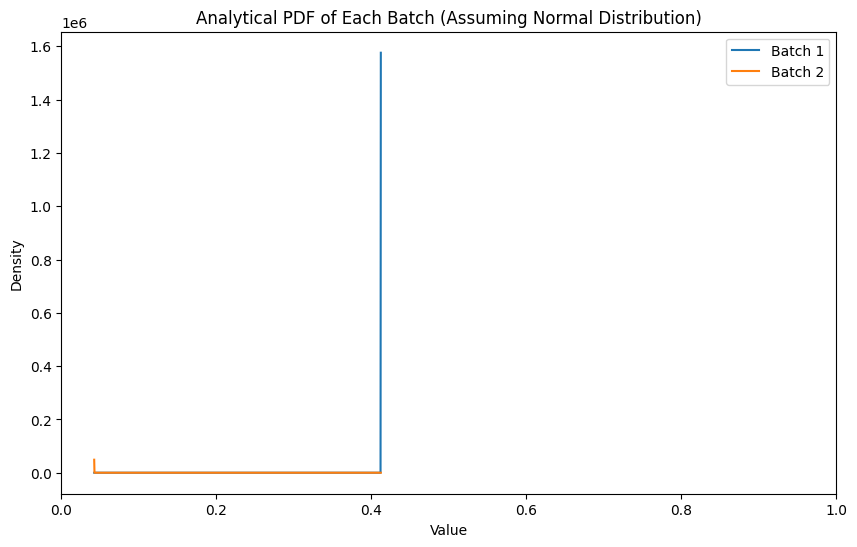

In [58]:

from vni import DEFAULT_TOLERANCE

variances = torch.tensor(
    [DEFAULT_TOLERANCE]*batch_size,
    device=device,
)

delta_dirac = torch.distributions.Normal(central_points, variances)

n_samples = 10000

out_distributions = delta_dirac.sample((n_samples,))
plot_distribution(out_distributions)

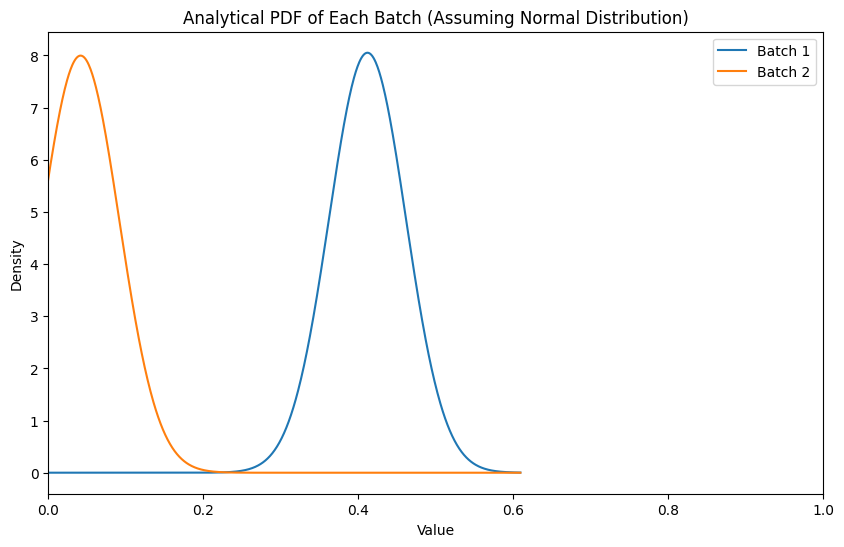

In [59]:
variances = torch.tensor(
    [0.05]*batch_size,
    device=device,
)

delta_dirac = torch.distributions.Normal(central_points, variances)

n_samples = 10000

out_distributions = delta_dirac.sample((n_samples,))
plot_distribution(out_distributions)